<a href="https://colab.research.google.com/github/TheAnjaliRai/Deep_Learning/blob/main/Implementation_of_ANN_using_Keras_weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of ANN using Keras**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.17.0
Keras Version 3.4.1


In [3]:
os.getcwd()

'/content'

**GPU /CPU CHECK**

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
check_list = ['GPU' , 'CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available")
  else:
    print(f"{device} is not available")


GPU is not available
CPU is available


Creating a simple classifier using Keras on MNIST data
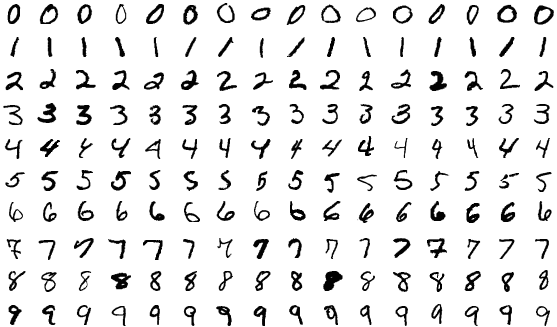

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [9]:
(X_train_full , y_train_full) , (X_test , y_test)  = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
X_train_full.shape  #60000 images , 28 pixels tall , 28 pixels wide

(60000, 28, 28)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_train_full[0].shape

(28, 28)

In [13]:
# creating  a validation data set from the full training data
# scaling the data between 0 to 1 by dividing it by 255 as its an unsigned data
# between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.


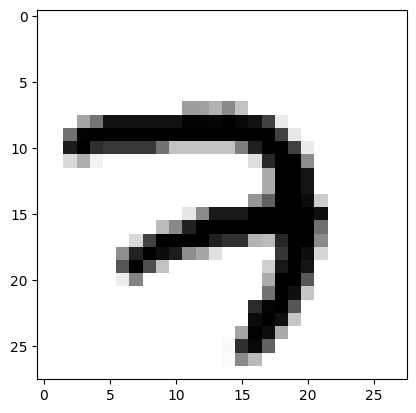

In [14]:
plt.imshow(X_train[0] , cmap = "binary")
plt.show()

<Axes: >

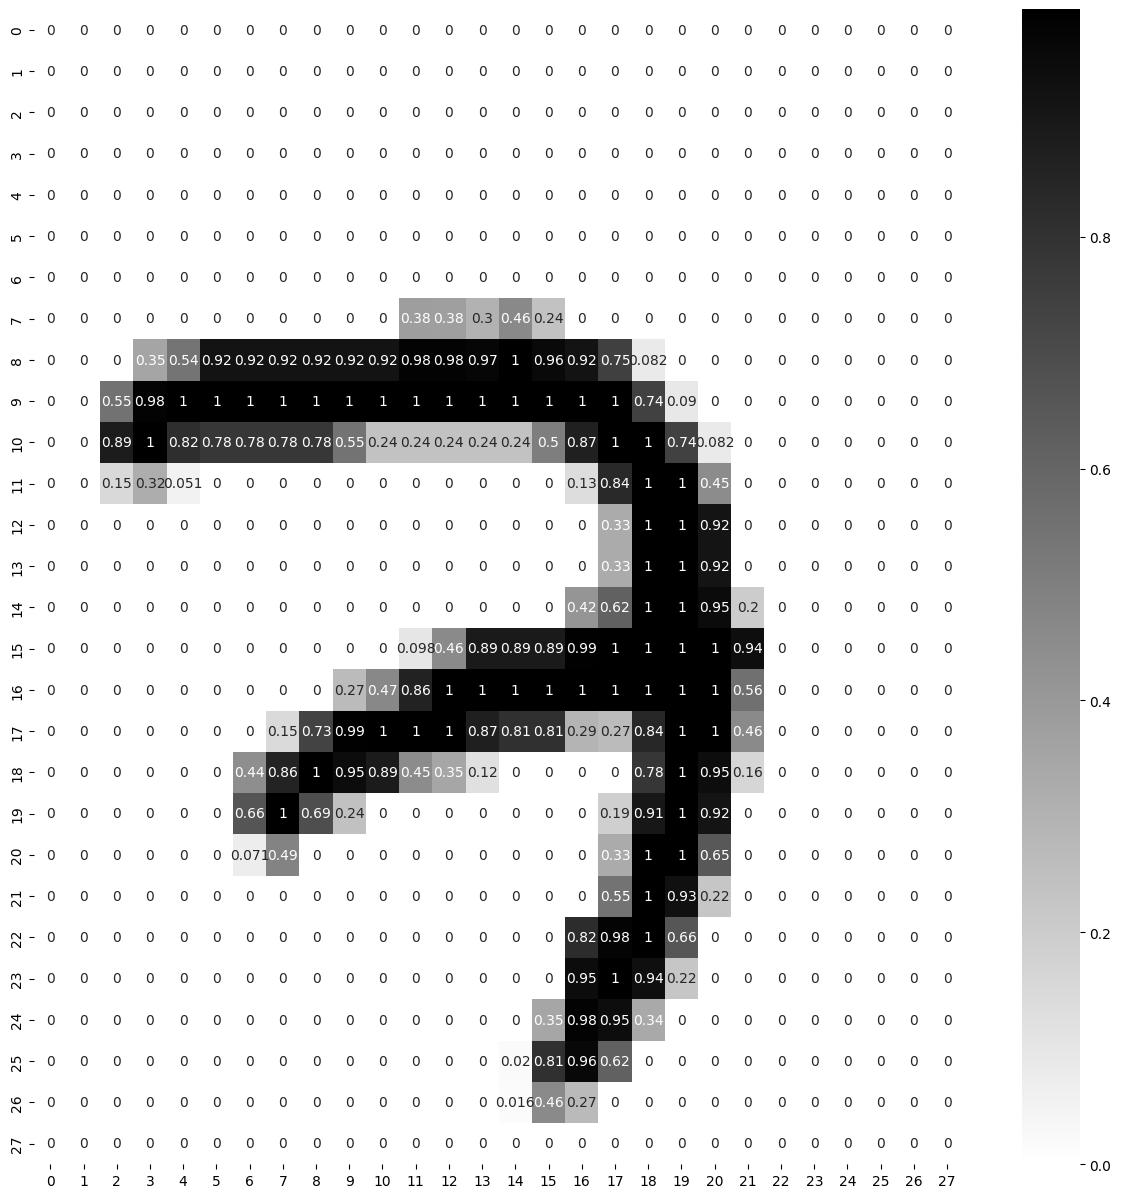

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0], annot = True , cmap = "binary")

In [16]:
# input = 28*28 = 784
# output = {0,1,2,3,4,5,6,7,8,9}

**Architechture used**


1. input layer = 784
2. hidden layer 1 = 300
3. hidden layer 2 = 100
4. output layer = 10

In [ ]:
# # Creating layers of ANN - METHOD 1
# LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name = "inputLayer"),
#           tf.keras.layers.Dense(300 , activation = "relu" ,kernal_initializer = tf.keras.initializer.HeNormal(seed = None), name = "hiddenLayer1"),
#           tf.keras.layers.Dense(100 , activation = "relu" ,kernal_initializer = tf.keras.initializer.HeNormal(seed = None) name = "hiddenLayer2"),
#           tf.keras.layers.Dense(10 , activation = "softmax" , name = "outputLayer")]

# model_clf = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# METHOD 2
from keras.models import Sequential
from keras.layers import Dense , Flatten,Dropout
model = Sequential()
model.add(Flatten(input_shape = [28,28]))
model.add(Dense(64 , activation = "relu" , kernel_initializer = tf.keras.initializers.HeNormal(seed = None)))
model.add(Dropout(0.2))
model.add(Dense(32 , activation = "relu",kernel_initializer = tf.keras.initializers.HeNormal(seed = None)))
model.add(Dropout(0.1))
model.add(Dense(16 , activation = "relu",kernel_initializer = tf.keras.initializers.HeNormal(seed = None)))
model.add(Dropout(0.2))
model.add(Dense(10 , activation = "softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
loss_function = "sparse_categorical_crossentropy"
optimizer = "SGD"
metrics = ["accuracy"]

model.compile(loss=loss_function, optimizer=optimizer,metrics = metrics )

In [25]:
# training
epochs = 10
validation_Set = (X_valid , y_valid)
history = model.fit(X_train , y_train , epochs = epochs,
                        validation_data = validation_Set , batch_size = 32)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4051 - loss: 1.6794 - val_accuracy: 0.8784 - val_loss: 0.4919
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7696 - loss: 0.7338 - val_accuracy: 0.9144 - val_loss: 0.3320
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8360 - loss: 0.5500 - val_accuracy: 0.9282 - val_loss: 0.2677
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8554 - loss: 0.4814 - val_accuracy: 0.9350 - val_loss: 0.2334
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8734 - loss: 0.4314 - val_accuracy: 0.9390 - val_loss: 0.2109
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8863 - loss: 0.3801 - val_accuracy: 0.9458 - val_loss: 0.1894
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8975 - loss: 0.3567 - val_accuracy: 0.9476 - val_loss: 0.1807
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9039 - loss: 0.3364 -

In [26]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [27]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.561055,1.276014,0.8784,0.491939
1,0.787836,0.682678,0.9144,0.332002
2,0.839673,0.534785,0.9282,0.267662
3,0.860927,0.467319,0.9350,0.233356
4,0.877691,0.418361,0.9390,0.210910
5,0.887055,0.383202,0.9458,0.189431
6,0.896691,0.356399,0.9476,0.180669
7,0.903691,0.333499,0.9508,0.168683
8,0.910382,0.315234,0.9516,0.161545
9,0.914145,0.300786,0.9584,0.145771


<Axes: >

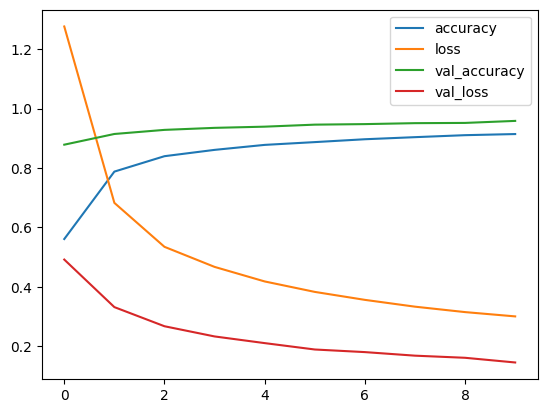

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9484 - loss: 0.1805


[0.15411846339702606, 0.9556000232696533]

CHECK TEST DATA

In [30]:
x_new = X_test[:5]

In [31]:
actual = y_test[:5]
actual

array([7, 2, 1, 0, 4], dtype=uint8)

<Axes: >

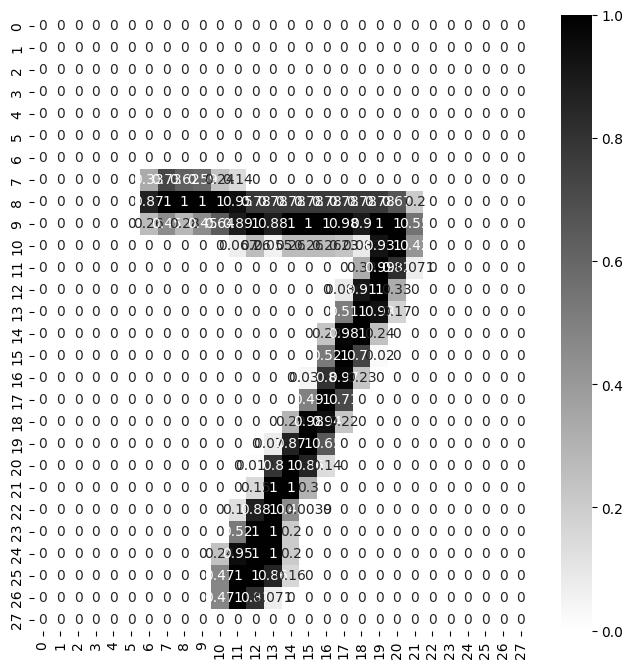

In [32]:
plt.figure(figsize = (8,8))
sns.heatmap(X_test[0],annot = True , cmap = 'binary')

In [34]:
y_prob = model.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.001,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.982, 0.   , 0.003, 0.001, 0.   ,
        0.014]], dtype=float32)

In [35]:
y_pred = np.argmax(y_prob , axis = -1)

In [36]:
y_pred

array([7, 2, 1, 0, 4])

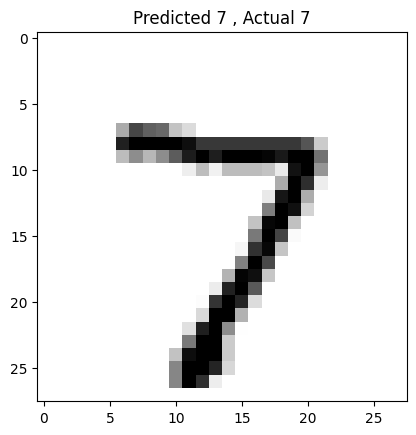

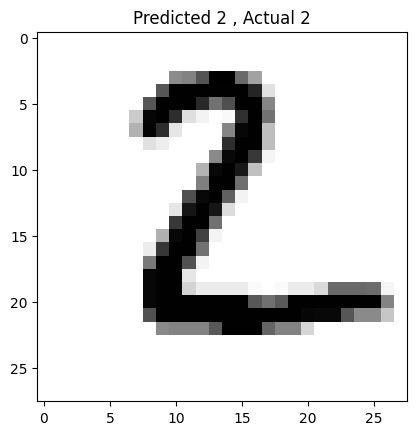

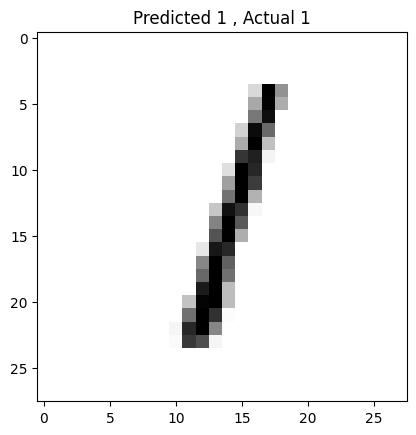

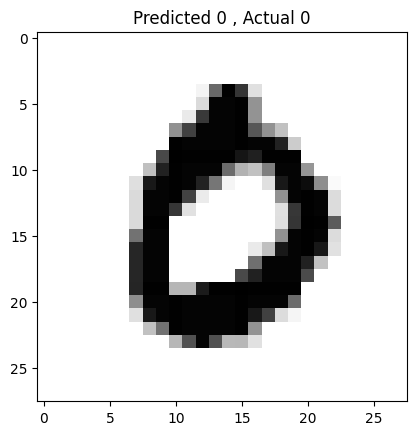

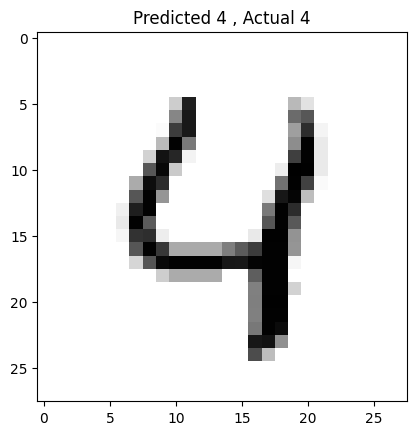

In [37]:
for data , pred , actual_data in zip(x_new , y_pred , actual):
  plt.imshow(data , cmap = "binary")
  plt.title(f"Predicted {pred} , Actual {actual_data}")
  plt.show()